
<img src="./logo_UTN.svg" align="right" width="150" /> 
 Teoría de Circuitos II

# Trabajo semanal 7
#### Israel Pavelek



##### Parte I - análisis de cuadripolos

* Obtener la transferencia de tensión fracción $\frac{V_o}{V_i}$ por método de cuadripolos (se sugiere referirse a alguno de los métodos de interconexión ya vistos). Ayuda: si $C_2=\frac{4}{3}$ (se utilizó 1.333 para la simulación), los polos de la transferencia están ubicados sobre una circunferencia de radio unitario.
* Valide la transferencia con simulación circuital.

##### Parte II - análisis matricial

* Construya la matriz de admitancia indefinida (MAI) del circuito.
* Compute la transferencia de tensión con la MAI.
* Compute la transferencia de tensión mediante el método de los continuantes.

##### Parte III - transformación de Bruton

* Aplique la transformación de Bruton.
* Valide con simulación circuital.
* Explique el criterio de construcción de la FDNR.
* Suponga que en el circuito original, la resistencia de carga se la utiliza para aprovechar su potencia activa de alguna forma (por ejemplo, es la resistencia equivalente de un parlante). Al aplicar la transformación de Bruton, ¿dónde se disipa esa potencia?


##### Parte I - análisis de cuadripolos

<img src="./Z.png" align="left" width="100" />

$\begin{bmatrix}
1 & Z\\
0 & 1
\end{bmatrix}$

.

.



<img src="./Y.png" align="left" width="75" /> 

$\begin{bmatrix}
1 & 0\\
Y & 1
\end{bmatrix}$

.

.


Nuestra red la podemos entender como:

<img src="./red.png" align="center" width="400" /> 


$T=T_1 \cdot T_2 \cdot T_3 \cdot T_4$

$T=\begin{bmatrix}
1 & Z_1\\
0 & 1
\end{bmatrix}$ 
$\begin{bmatrix}
1 & 0\\
Y_1 & 1
\end{bmatrix}$
$\begin{bmatrix}
1 & Z_2\\
0 & 1
\end{bmatrix}$ 
$\begin{bmatrix}
1 & 0\\
Y_L & 1
\end{bmatrix}$

$T=\begin{bmatrix}
1+Z_1Y_1 & Z_1\\
Y_1 & 1
\end{bmatrix}$ 
$\begin{bmatrix}
1 & Z_2\\
0 & 1
\end{bmatrix}$ 
$\begin{bmatrix}
1 & 0\\
Y_L & 1
\end{bmatrix}$

$T=\begin{bmatrix}
1+Z_1Y_1 & Z_2+Z_1Z_2Y_1+Z_1\\
Y_1 & Y_1Z_2+1
\end{bmatrix}$ 
$\begin{bmatrix}
1 & 0\\
Y_L & 1
\end{bmatrix}$

Como buscamos la transfernacia solo nos importa encontrar $\frac1A$

$A=1+Z_1Y_1+Y_L(Z_2+Z_1Z_2Y_1+Z_1$

Si $Z_1=\frac32S$ $Z_2=\frac12S$ $Y_1=\frac43S$ $Y_L=1$

$A=1+\frac32S\frac43S+\frac12S+\frac32S\frac12S\frac43S+\frac32S$

$A=a+2S^2+\frac12S+S^3+\frac32S$

$A=S^3+2S^2+2S+1$

$$\frac{V_0}{V_1}=\frac1A=\frac{1}{S^3+2S^2+2S+1}$$

Simulación circuital:

<img src="./simu1.png" align="center" width="400" /> 


Vemos claramente que corresponde a un filtro de Butterworth (Maxima planicidad) de 3er orden.

Comparemos igualmente con la simulación matemática


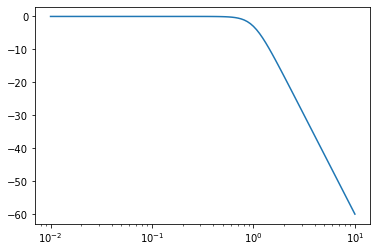

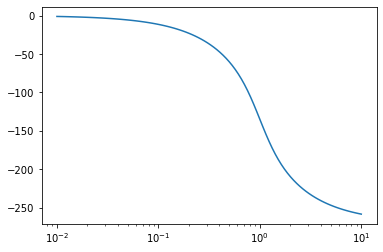

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
sys = signal.TransferFunction([1], [1, 2,2,1])
w, mag, phase = signal.bode(sys)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

##### Parte II - análisis matricial
Numeramos a los nodos:

<img src="./MAI.png" align="center" width="400" /> 

MAI:

$\begin{bmatrix}
\frac2{3S} & -\frac2{3S} & 0 & 0\\
-\frac2{3S} & \frac43S+\frac{8}{3S} & -\frac2S & -\frac{4}{3S}\\
0 & -\frac2S & 1+\frac12S & -1\\
0 &-\frac43S & -1 & \frac43S+1\\
\end{bmatrix}$

$\frac{V_0}{V_1}=\frac{V_{34}}{V_{14}}=sgn(3-4)sgn(1-4)\frac{Y^{34}_{14}}{Y^{14}_{14}}$

$\frac{V_0}{V_1}=\frac{
\begin{bmatrix}
-\frac2{3S} & \frac43S+\frac{8}{3S}\\
0 & -\frac2S
\end{bmatrix}
}{
\begin{bmatrix}
\frac43S+\frac{8}{3S} & -\frac2S\\
-\frac2S & 1+\frac2S
\end{bmatrix}
}=
\frac{\frac{4}{3S^2}}{\frac43S+\frac{8}{3S}+\frac83+\frac{16}{3S^2}-\frac{4}{S^2}}$

$\frac{V_0}{V_1}=\frac{4}{4S^3+8S+8S^2+16-12}=\frac{4}{4S^3+8S^2+8S+4}$


$$\frac{V_0}{V_1}=\frac{1}{S^3+2S^2+2S+1}$$

### Por el metodo de los continuantes

$Y=\begin{bmatrix}
\frac32S & 1 &0&0\\
-1 & \frac43S&1 &0\\
0 &-1 & \frac{S}{2}&1\\
0 &0&-1&1
\end{bmatrix}$

Multiplicamos la fila 2 por $\frac32S$

$Y=\begin{bmatrix}
\frac32S & 1 &0&0\\
-\frac32S & 2S^2 &\frac32S &0\\
0 &-1 & \frac{S}{2}&1\\
0 &0&-1&1
\end{bmatrix}$

Sumamos Fila 1 y Fila 2 y dejamos el resultado en Fila 

$Y=\begin{bmatrix}
\frac32S & 1 &0&0\\
0 & 2S^2+1 &\frac32S &0\\
0 &-1 & \frac{S}{2}&1\\
0 &0&-1&1
\end{bmatrix}$

Multiplicamos Fila 1 por $\frac2{3S}$

$Y=\begin{bmatrix}
1 & \frac{2}{3S} &0&0\\
0 & 2S^2+1 &\frac32S &0\\
0 &-1 & \frac{S}{2}&1\\
0 &0&-1&1
\end{bmatrix}$

Ahora el calculo del determinante de la matriz de 4x4 es igual al calculo del determinante de la matriz:

$|Y|=\begin{bmatrix}
2S^2+1 &\frac32S &0\\
-1 & \frac{S}{2}&1\\
0&-1&1
\end{bmatrix}=(2S^2+1)\frac{S}{2}+(2S^2+1)+\frac32S$

$|Y|=S^3+\frac{S}{2}+2S^2+1+\frac32S$

$$\frac1{|Y|}=\frac{V_0}{V_1}=\frac{1}{S^3+2S^2+2S+1}$$










##### Parte III - transformación de Bruton

Aplicando la transformación de Brutton obtenemos el siguiente circuito: 

<img src="./brutton.png" align="center" width="600" /> 

Simulando..

<img src="./fdnr.png" align="center" width="600" /> 

En donde hemos creado un componente llamado FDNR al que le seteamos el valor de D como parámetro.

Para la construcción del FDNR utilizamos un circuito de Antoniu en donde su impendancia de entrada viene dada por:

$Z_{in}=\frac{Z_1Z_3Z_5}{Z_2Z_4}$

El FDNR posee una impadancia dada por:

$Z_{FDNR}=\frac{1}{DS^2}$ 

Siendo D el parámetro del FDNR debemos colocar un polo doble de impandancia, como siempre tratamos de evitar la colocación de inductores, por lo tanto debemos colocar dos capacitores, y para ello podemos colocarlo en $Z_1$ $Z_3$ y/o $Z_5$ Por cuestiones de diseñoes mejor que $Z_3$ y $Z_2$ sean de la misma naturaleza por lo tanto resistores de ahí que colocamos capacitores en $Z_1$ y en $Z_5$.
Si $Z_4$ es un resistor y los capacitores son iguales obtenemos como impedancia de entrada al circuito.

$Z_{FDNR}=\frac{1}{R_4C^2S^2}$ 

Siendo $D=R_4C^2$

<img src="./FDNRcir.png" align="center" width="400" /> 

Si la carga debiera disipar potencia, al realizar la transformación de Brutton, la potencia se reparte por todos los resistores del circuito. En nuestro circuito son los dos resistores que reemplazaron a los inductores quienes disipan energía. El FDNR al ser de caracter resistivo-negativo entrega energía al sistema.Al realizar la transformación de Brutton, modelamos el caracter matemático y la respuesta del sistema con un nuevo circuito equivalente pero no así el comportamiento físico de cada componente. Por ejemplo al reemplazar los inductores (luego de la transformación de Brutton) ya nadie genera campo magnético. 

Si el circuito anterior debiera si o si utilizar la carga resistiva podria separarse con un buffer a fin de mantener la carga su caracter resistivo y el circuito su comportamiento de filtro equivalente.


<img src="./FDNRbuffer.png" align="center" width="400" /> 

Y en caso de ser necesario tambien podria colocarse un buffer a la entrada.   